In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np

In [19]:
df = pd.read_excel("../data/datosRed.xlsx")

In [20]:
df

,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
1,2019,ID_2,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
2,2019,ID_3,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
3,2019,ID_4,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
4,2019,ID_5,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
...,...,...,...,...,...,...
10379,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10380,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10381,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10382,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA


In [21]:
df.head()

,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
1,2019,ID_2,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
2,2019,ID_3,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
3,2019,ID_4,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
4,2019,ID_5,SERV_1,TAREA_1.1,PRESENCIAL,BAJA


### Datos duplicados

In [22]:
dfDuplicated = df[df.duplicated(keep=False)]

print(f"Se han encontrado {dfDuplicated.shape[0]} representando el {dfDuplicated.shape[0] * 100 / df.shape[0]:.2f} %")

dfDuplicated

Se han encontrado 3797 representando el 36.57 %


,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
5,2019,ID_6,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
8,2019,ID_9,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
9,2019,ID_10,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
15,2019,ID_16,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
...,...,...,...,...,...,...
10379,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10380,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10381,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10382,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA


Se han decido remover ya que no brinda informacion adicional al dataset

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df['TIPO DE SERVICIO'].value_counts()

TIPO DE SERVICIO
SERV_2    3441
SERV_1    3260
SERV_4     681
SERV_5     295
SERV_6     119
SERV_7     111
SERV_3      48
Name: count, dtype: int64

In [25]:
df['NOMBRE DE LA TAREA'].value_counts()

NOMBRE DE LA TAREA
TAREA_2.2    2709
TAREA_1.1    2653
TAREA_2.1     732
TAREA_1.2     604
TAREA_4.3     331
TAREA_4.1     306
TAREA_5.1     188
TAREA_6.1     119
TAREA_7.1     111
TAREA_5.2      91
TAREA_3.1      41
TAREA_4.4      37
TAREA_5.3      16
TAREA_4.2       7
TAREA_3.2       3
TAREA_3.3       3
TAREA_1.3       3
TAREA_3.4       1
Name: count, dtype: int64

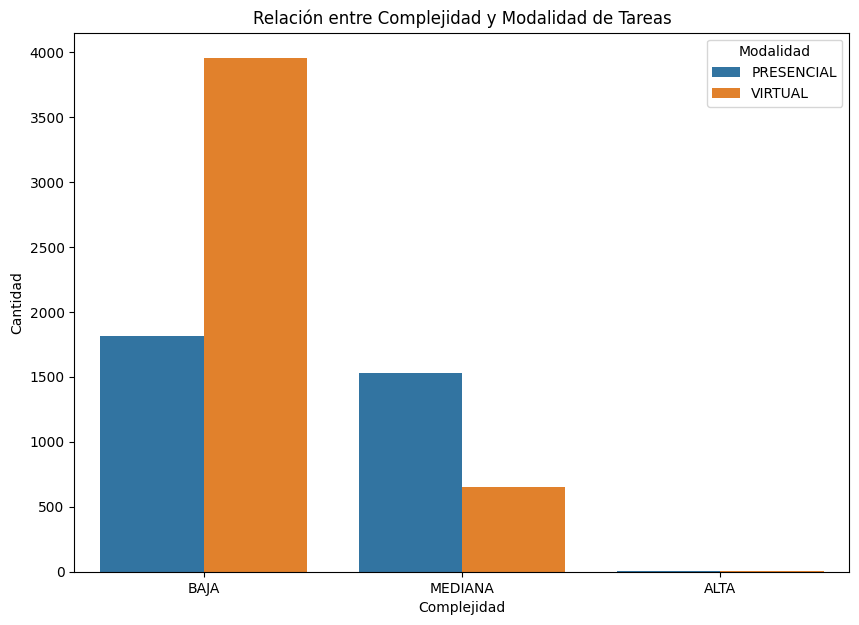

In [26]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='COMPLEJIDAD', hue='MODALIDAD', order=['BAJA', 'MEDIANA', 'ALTA'])
plt.title('Relación entre Complejidad y Modalidad de Tareas')
plt.xlabel('Complejidad')
plt.ylabel('Cantidad')
plt.legend(title='Modalidad')
plt.show()

In [27]:
B = nx.Graph()

clientes = df['PERSONA'].unique()
servicios = df['TIPO DE SERVICIO'].unique()
B.add_nodes_from(clientes, bipartite=0)
B.add_nodes_from(servicios, bipartite=1)

B.add_edges_from([tuple(x) for x in df[['PERSONA', 'TIPO DE SERVICIO']].values])

G_clientes = bipartite.projected_graph(B, clientes)

In [28]:
print(G_clientes.number_of_nodes())
print(G_clientes.number_of_edges())
print(nx.density(G_clientes))

5090
7189307
0.5550943307360805


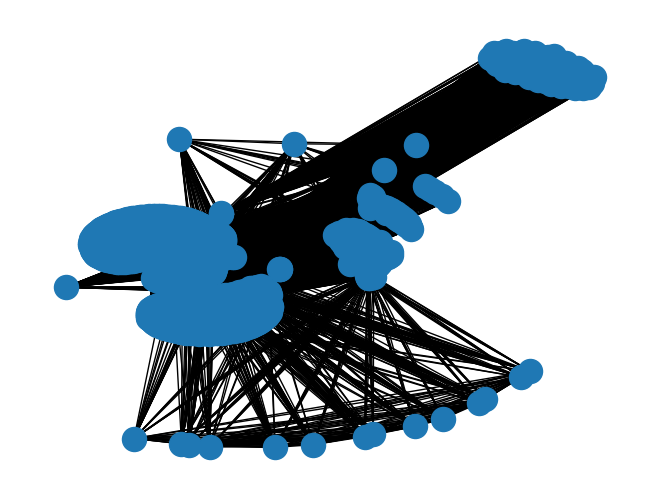

In [29]:
nx.draw(G_clientes)

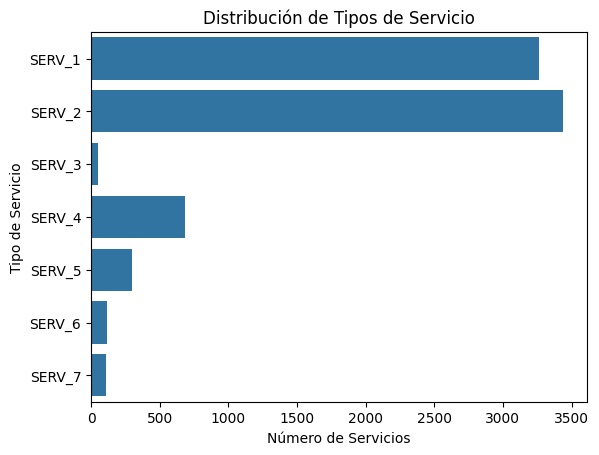

In [30]:
sns.countplot(y='TIPO DE SERVICIO', data=df)
plt.title('Distribución de Tipos de Servicio')
plt.xlabel('Número de Servicios')
plt.ylabel('Tipo de Servicio')
plt.show()

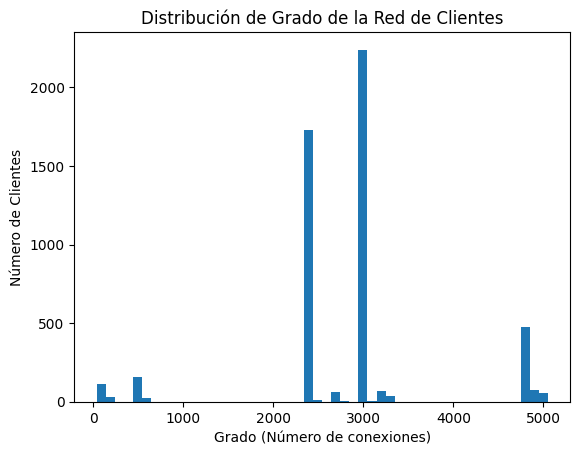

In [31]:
grados = [val for (node, val) in G_clientes.degree()]

plt.hist(grados, bins=50)
plt.title('Distribución de Grado de la Red de Clientes')
plt.xlabel('Grado (Número de conexiones)')
plt.ylabel('Número de Clientes')
plt.show()

In [32]:
num_componentes = nx.number_connected_components(G_clientes)
print(f"La red tiene {num_componentes} componente(s) conectado(s).")

La red tiene 1 componente(s) conectado(s).


In [33]:
def random_node(g):
    return[np.random.choice(g.nodes())]

def dismantle(g, function, **args): #remover nodoss de forma incremetnal y calcular el tamaños de los componentes conectados
    total_nodes=g.number_of_nodes()
    removed_nodes=[]
    components=[]
    while len(g.nodes())>1:
        n=function(g,**args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps=list(nx.connected_components(g))
        g_size=0
        if len(comps)>0:
            g_size=max(len(c) for c in comps)/total_nodes
        components.append(g_size)
    return removed_nodes, components


def plot_dismantle(x,y):
    plt.plot(x,y)
    plt.xlabel("removed nodes") 
    plt.ylabel("giant component size")
    plt.show()



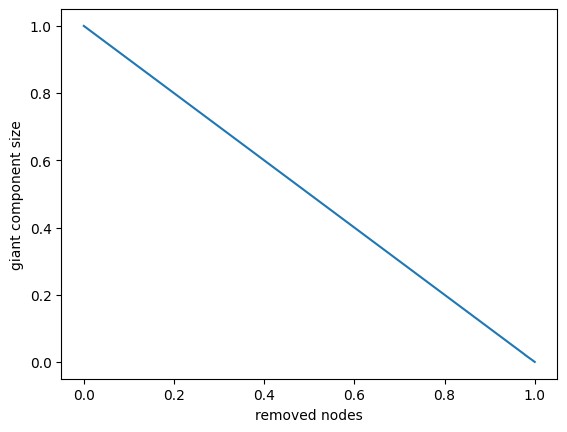

In [34]:
h=G_clientes.copy()
rn , comps=dismantle(h,random_node)
plot_dismantle(rn,comps)

In [35]:
def get_sorted_nodes(g,score,reverse=True): 
    nodes=score(g)
    if isinstance(nodes,dict):
        nodes=[(k,v) for k,v in nodes.items()]
    srt=sorted(nodes,key=lambda k:k[1],reverse=reverse)
    return [x[0] for x in srt]

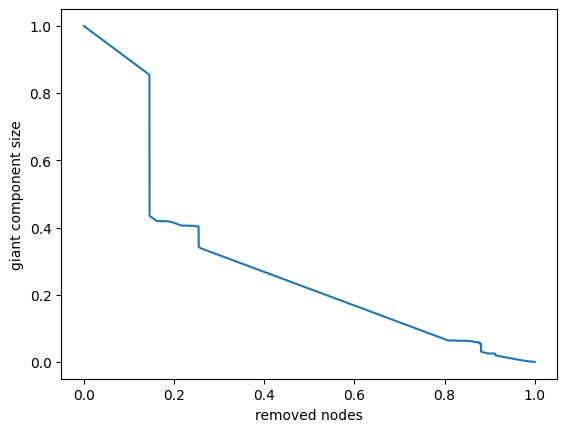

In [36]:
h=G_clientes.copy()
rn , comps=dismantle(h,get_sorted_nodes ,score=nx.degree)
plot_dismantle(rn,comps)